In [1]:
import numpy as np
import pandas as pd
from numpy.fft import fft, rfft
from scipy.stats import skew, kurtosis
import csv, mne, math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
target = "chb16"
file = "chb16_14.edf"
drive_path = "C:/Users/Eugene Chen/Desktop/UNI/Project/Data/"
seizure_pointers = pd.read_excel(drive_path + "seizure data.xlsx", index_col=0)
seizure_pointers["index"] = (
    seizure_pointers["seizure_file"]
    + " "
    + seizure_pointers["seizure_number"].astype(str)
)
record_path = drive_path+"/"+target+file
channels = [
    "P8-O2",
    "C4-P4",
    "FP1-F3",
    "FP2-F8",
    "CZ-PZ",
    "FP1-F7",
    "T7-P7",
    "C3-P3",
    "FP2-F4",
    "P4-O2",
    "F8-T8",
    "F7-T7",
    "F3-C3",
    "FZ-CZ",
    "P3-O1",
    "P7-O1",
    "F4-C4",
]
patient = seizure_pointers[seizure_pointers["index"] == "chb16_14 1"]

In [3]:
patient["case"].values[0]

'chb16'

In [48]:
seizure_start = patient.seizure_start.values[0]
seizure_duration = patient.seizure_duration.values[0]
edf_data = mne.io.read_raw_edf(
            drive_path
            + "chb-mit-scalp-eeg-database-1.0.0/"
            + patient.case.values[0]
            + "/"
            + patient.seizure_file.values[0]
            + ".edf/",
            preload=True,
            verbose=50
        )
edf_data.filter(h_freq=40, l_freq=0, verbose=False)
edf_data.drop_channels(list(set(edf_data.ch_names) - set(channels)))
seizures = mne.Annotations(
                onset=seizure_start, duration=seizure_duration, description="bad"
            )
edf_data.set_annotations(seizures)
seizure_sample = mne.concatenate_raws(
                edf_data.crop_by_annotations(), verbose=50
            )
non_seizures = mne.make_fixed_length_epochs(
                edf_data, seizure_duration, reject_by_annotation=True, verbose=50
            )

In [49]:
sample_id = 30
channel = 4

no_seizure = non_seizures[sample_id]._get_data(verbose=50)[0][channel]
sample_len = no_seizure.shape[0]
seizure = seizure_sample.get_data()[:,:sample_len][channel]
step = seizure_duration/sample_len
x = np.arange(0, seizure_duration, step)


In [50]:
sns.set(font='arial',
        rc={
            'axes.edgecolor': 'lightgrey',
            'axes.facecolor': 'None',
            'axes.grid': False,
            'axes.labelcolor': 'dimgrey',
            'axes.spines.right': False,
            'axes.spines.top': False,
            'figure.facecolor': 'white',
            'lines.solid_capstyle': 'round',
            'patch.edgecolor': 'w',
            'patch.force_edgecolor': True,
            'text.color': 'dimgrey',
            'xtick.bottom': False,
            'xtick.color': 'dimgrey',
            'xtick.direction': 'out',
            'xtick.top': False,
            'ytick.color': 'dimgrey',
            'ytick.direction': 'out',
            'ytick.left': False,
            'axes.axisbelow': False,
            'ytick.right': False})

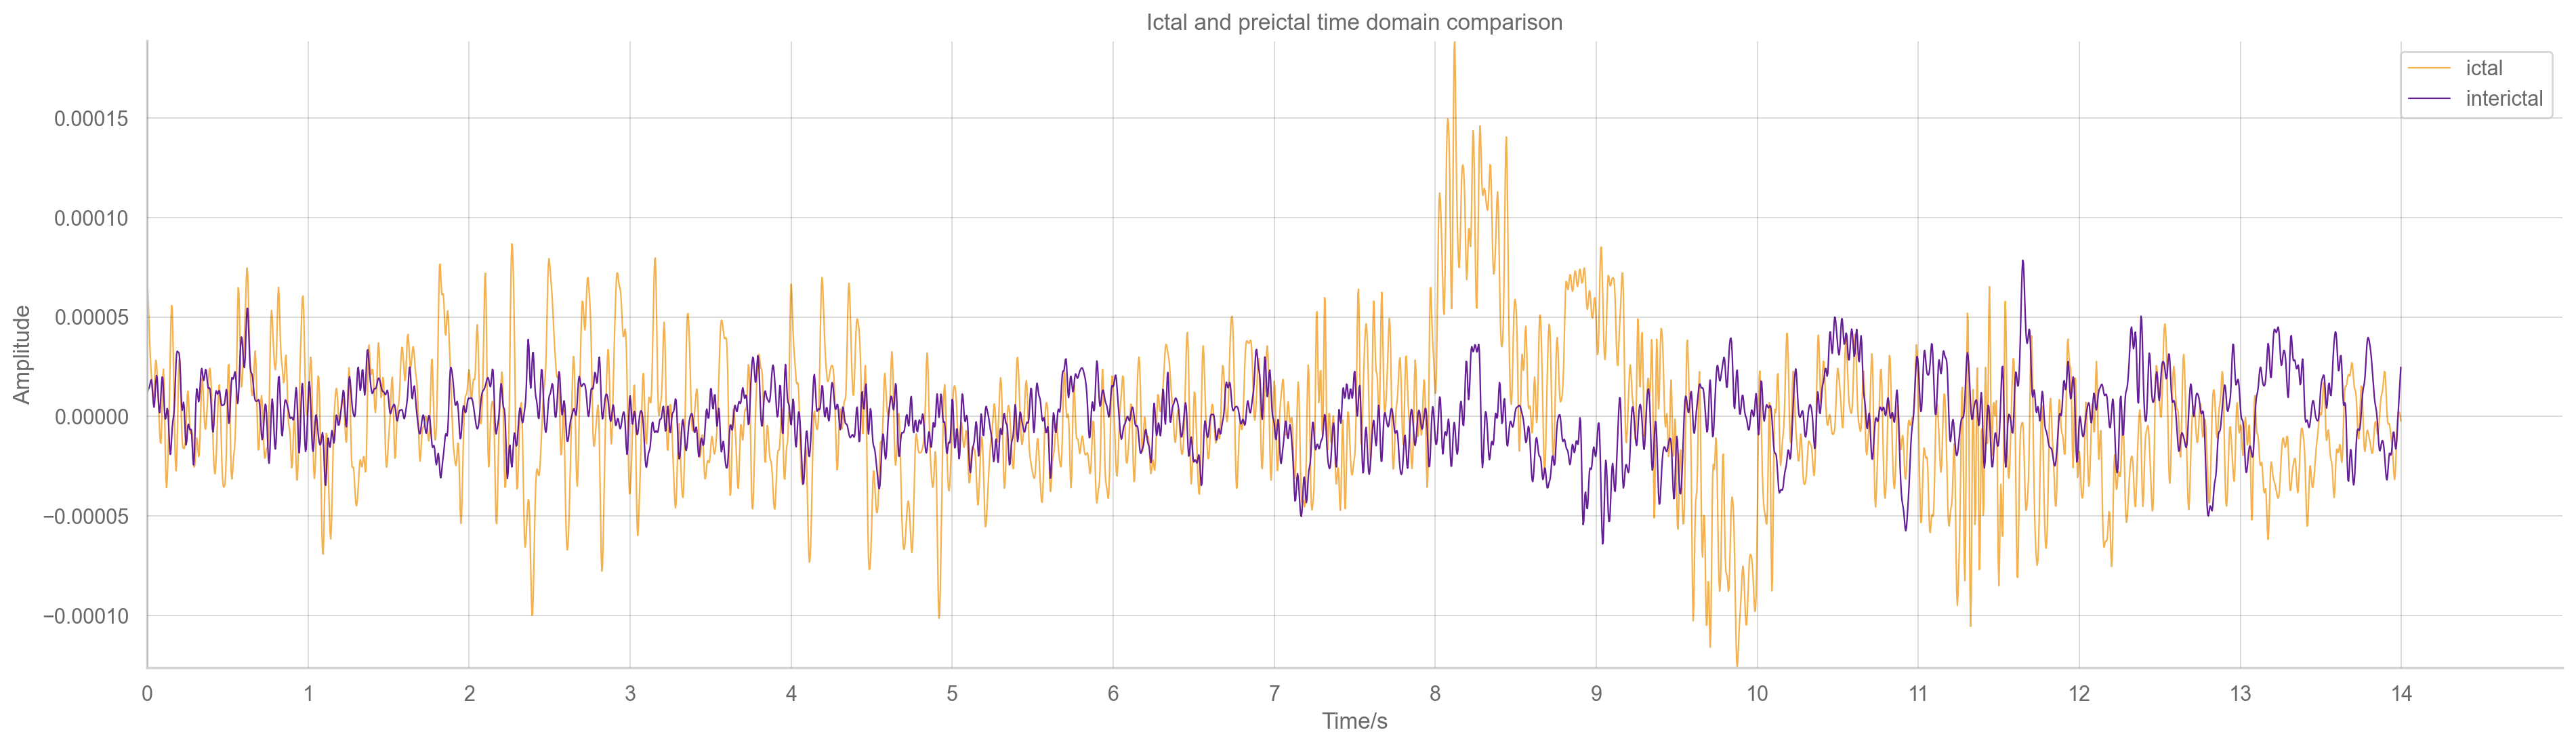

In [63]:
fig, ax = plt.subplots(figsize=(23, 6), dpi=200)
ax.grid(color='black', linestyle='-', linewidth=0.1)
ax.set_xticks(np.arange(0, 15, 1)) 
ax.axis(xmin=0,xmax=15,ymax=seizure.max(),ymin=seizure.min())
ax.plot(x, seizure, color ='#F5B14C', linewidth=0.8, label="ictal")
ax.plot(x, no_seizure, color ='#661D98', linewidth=0.8, label="interictal")
ax.set_title("Ictal and preictal time domain comparison")
ax.set_xlabel("Time/s")
ax.set_ylabel("Amplitude")
ax.legend()

In [52]:
ictal_ft = abs(rfft(seizure))
preictal_ft = rfft(no_seizure)
N = len(ictal_ft)
n = np.arange(N)
T = seizure_duration
freq = n/T

In [80]:
bach_size=30
reduced_ictal_fft=[]
bach=[]
ictal_fft_features = []
for i in ictal_ft:
    if len(bach)==bach_size:
        bach_mean = sum(bach)/bach_size
        reduced_ictal_fft+=[bach_mean]*bach_size
        ictal_fft_features.append(bach_mean)
        bach=[]
    bach.append(i)
bach_mean = sum(bach)/bach_size
reduced_ictal_fft+=[bach_mean]*bach_size
ictal_fft_features.append(bach_mean)

In [81]:
len(ictal_fft_features)

60

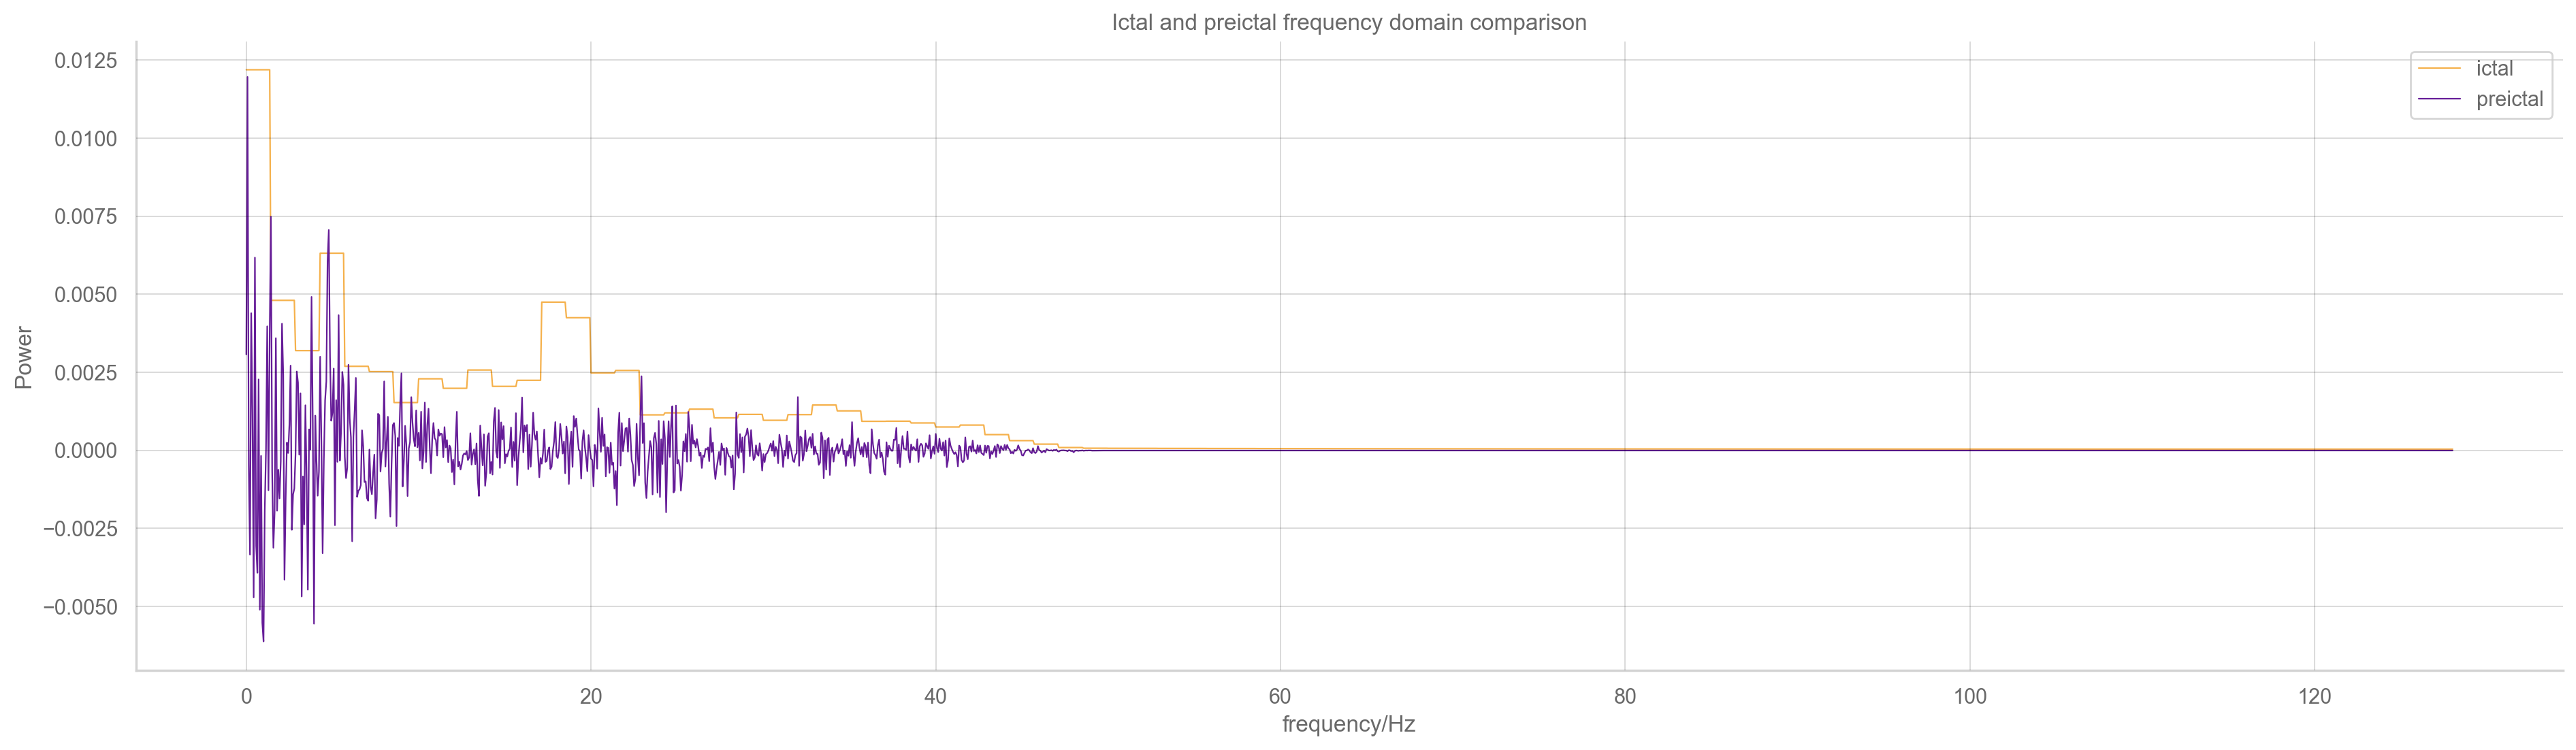

In [75]:
fig, ax = plt.subplots(figsize=(23, 6), dpi=200)
ax.grid(color='black', linestyle='-', linewidth=0.1)
# ax.axis(ymax=ictal_ft.max(),ymin=0)
ax.plot(freq, reduced_ictal_fft, color ='#F5B14C', linewidth=0.8, label="ictal")
ax.plot(freq, preictal_ft, color ='#661D98', linewidth=0.8, label="preictal")
ax.set_title("Ictal and preictal frequency domain comparison")
ax.set_xlabel("frequency/Hz")
ax.set_ylabel("Power")
ax.legend()

In [2]:
import torch

c:\Users\Eugene Chen\Desktop\UNI\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
